In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
mnist = datasets.load_digits()

In [4]:
(X_train, X_test, y_train, y_test) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.33, random_state=42)
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [5]:
print("X_train.shape: ", X_train.shape)
print("X_train[0].shape: ",X_train[0].shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (806, 64)
X_train[0].shape:  (64,)
y_train.shape:  (806,)


A label for 8th sample in the training set is 5


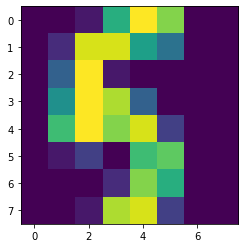

In [6]:
sample_number = 8
n_col = 8
n_row = 8
im=plt.imshow(X_train[sample_number].reshape(n_col,n_col))
print('A label for %dth sample in the training set is %d' % (sample_number, y_train[sample_number]))

## I. K-Nearest Neighbor (KNN)
### K-Nearest Neighbor Algorithm with below conditions

> a. Predict label of first test sample  
> b. Assume that the data is randomly ordered   
> c. Learning rate = 0.8   
> d. Number of iterations = 100,000   
> e. Number of ensemble = 1000
> f. Loss function = average RSS (i.e., (1/N)*RSS where N is a total number of samples)   
> g. Initialize all weight values to 0

- Predict label of first test sample when k=20
- Get accuracy on test data when k=10 
- Plot accuracy on the validation set according to the value of $k$, where $k = 1,2,...,20$
- Choose the optimal $k$ value from the plot
- Compute accuracy on the test set

In [7]:
def predict(X_train, y_train, one_sample, k):  
    
    candidate = y_train[np.sqrt(np.sum(np.power(X_train-one_sample, 2), axis=1)).argsort()[:k]]
    dic = {}
    for label in candidate:
        if label not in dic: dic[label] = 1
        else: dic[label] += 1
    dic = list(dic.items())
    prediction = dic[0]
    for i in range(1, len(dic)):
        if dic[i][1] > prediction[1]:
            prediction = dic[i]
    prediction = prediction[0]
        
    return prediction


def accuracy(X_train, y_train, X_test, y_test, k):
    
    acc = 0
    for i in range(X_test.shape[0]):
        y_hat = predict(X_train, y_train, X_test[i], k)
        if y_hat == y_test[i]: acc += 1
    
    acc = 100 * acc/X_test.shape[0]
             
    return acc


def stack_accuracy_over_k(X_train, y_train, X_val, y_val):
    
    accuracies = []    
    for k in range(1, 21):
        accuracies.append(accuracy(X_train, y_train, X_val, y_val, k))

    return accuracies

In [8]:
k = 20
prediction_of_first_sample = predict(X_train, y_train, X_test[0], k)

In [9]:
print(prediction_of_first_sample)

6


In [10]:
label_of_first_sample = y_test[0]
print(label_of_first_sample)

6


A label of first sample in the test set is 6


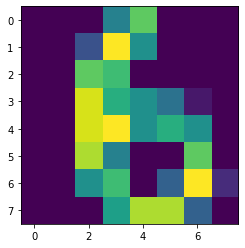

In [11]:
n_col = 8
n_row = 8
im=plt.imshow(X_test[0].reshape(n_col,n_col))
print('A label of first sample in the test set is %d' % (y_test[0]))

In [12]:
print("Prediction and label are same :", (prediction_of_first_sample==label_of_first_sample))

Prediction and label are same : True


In [13]:
k =10 
accuracy_when_k_equals_10 = accuracy(X_train, y_train, X_test, y_test, k)

In [14]:
print(accuracy_when_k_equals_10)

98.14814814814815


In [15]:
accuracies = stack_accuracy_over_k(X_train, y_train, X_val, y_val)

Text(0, 0.5, 'Validation accuracy')

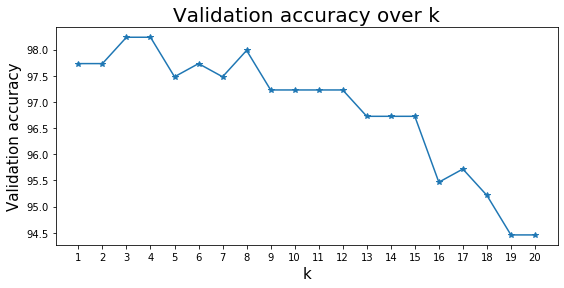

In [16]:
plt.figure(figsize=(9,4))
plt.plot(np.arange(20)+1, accuracies, marker= '*')
plt.xticks(np.arange(1, 21, step=1))
plt.title('Validation accuracy over k', fontsize=20)
plt.xlabel('k', fontsize=15)
plt.ylabel('Validation accuracy', fontsize=15)

In [17]:
optimal_k = np.argmax(np.asarray(accuracies))+1

In [18]:
optimal_k

3

In [19]:
acc = accuracy(X_train, y_train, X_test, y_test, optimal_k)
print(acc)

98.65319865319866
